# Dutch Births and Deaths - 1995 - 2017
Our raw data stems from https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70703ned/table?ts=1566653756419 
Daily statistics on births and deaths.

Steps:
* load JSON file dutch-births-and-deaths-since-1995.json
* set timestamp column
* visualize deaths statistics in a line chart


In [42]:
import json
import pandas as pd

ss = pd.read_json("dutch-births-and-deaths-since-1995.json")
ss.head(5)

,value
0,"{'ID': 0, 'Perioden': '1995JJ00', 'MannenEnVro..."
1,"{'ID': 1, 'Perioden': '1995MM01', 'MannenEnVro..."
10,"{'ID': 10, 'Perioden': '19950109', 'MannenEnVr..."
100,"{'ID': 100, 'Perioden': '19950406', 'MannenEnV..."
1000,"{'ID': 1000, 'Perioden': '19970809', 'MannenEn..."


In [43]:
import datetime
def parse_full_date(row):
    dateString = row["Perioden"]
    if ('MM' in dateString) or ('JJ' in dateString) or ('X' in dateString):
        return None
    else:
      date = datetime.datetime.strptime(dateString, "%Y%m%d")
      return date

def parse_death_count(row):
    deathCount = int(row["MannenEnVrouwen_4"])
    return deathCount
    
ss["date"] = ss['value'].apply(parse_full_date)
ss["deathCount"] = ss['value'].apply(parse_death_count)
ss.head(14)

,value,date,deathCount
0,"{'ID': 0, 'Perioden': '1995JJ00', 'MannenEnVro...",NaT,135675
1,"{'ID': 1, 'Perioden': '1995MM01', 'MannenEnVro...",NaT,11974
10,"{'ID': 10, 'Perioden': '19950109', 'MannenEnVr...",1995-01-09,409
100,"{'ID': 100, 'Perioden': '19950406', 'MannenEnV...",1995-04-06,395
1000,"{'ID': 1000, 'Perioden': '19970809', 'MannenEn...",1997-08-09,341
1001,"{'ID': 1001, 'Perioden': '19970810', 'MannenEn...",1997-08-10,379
1002,"{'ID': 1002, 'Perioden': '19970811', 'MannenEn...",1997-08-11,397
1003,"{'ID': 1003, 'Perioden': '19970812', 'MannenEn...",1997-08-12,430
1004,"{'ID': 1004, 'Perioden': '19970813', 'MannenEn...",1997-08-13,454
1005,"{'ID': 1005, 'Perioden': '19970814', 'MannenEn...",1997-08-14,429


In [47]:
# create data frame called data that contains only the data per day
data = ss[ss['date'].notnull()][['date','deathCount']]
data.set_index(data["date"],inplace=True)
data.head(4)

,date,deathCount
date,,
1995-01-09,1995-01-09,409
1995-04-06,1995-04-06,395
1997-08-09,1997-08-09,341
1997-08-10,1997-08-10,379


In [14]:
d.head(5)

,date,deathCount
date,,
1995-01-09,1995-01-09,409
1995-04-06,1995-04-06,395
1997-08-09,1997-08-09,341
1997-08-10,1997-08-10,379
1997-08-11,1997-08-11,397


In [15]:
# save death data to CSV file 
d = data[['date','deathCount']]
export_csv = d.to_csv (r'dutch_deaths_1995-2017.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


# Visualization of Death Count Data
Let's look at the evolution of the number of deaths over the years (1995-2017) to see the longer term trends. 

In [16]:
# initialize libraries
import plotly.graph_objs as go
import plotly.express as px
from chart_studio.plotly import plot, iplot
from plotly.subplots import make_subplots

In [48]:
# sample data by year; calculate average daily deathcount
d= data.resample('Y').mean()['deathCount'].to_frame(name='deathCount')
d["date"]= d.index

# average daily death count per year (and/or total number of deaths per year)
fig = px.line(d, x="date", y="deathCount", render_mode='svg',labels={'grade_smooth':'gradient'}
              , title="Average Daily Death Count per Year")
fig.update_layout(yaxis_range=[350,430])
fig.show()

Conclusion from the overhead plot: there is a substantial fluctuation between years and there seems to be an upward trend (probably correlated with growth of total population - some 60-70 years prior to the years shown here)

In [18]:
# sample data by year; calculate average daily deathcount
d= data.copy().resample('Y').sum()['deathCount'].to_frame(name='deathCount')
d["date"]= d.index

fig = px.bar(d , x="date", y="deathCount"
             ,title="Total Number of Deaths per Year"
            , range_y=[125000,155000]
             , barmode="group"
            )
fig.show()

## fine grained death count per day in a certain period
The next scatter plot shows all number of deaths on day values for a randomly chosen period. 

In [19]:
# time to visualize - just date on the horizontal axis and deathCount on the vertical axis
# arbitrarily show 2013
# ensure axis range from 0-550
fig = px.scatter(data, x="date", y="deathCount", render_mode='svg',labels={'grade_smooth':'gradient'}, title="Death Count per Day")
fig.update_layout(xaxis_range=[datetime.datetime(2013, 1, 1),
                               datetime.datetime(2013, 12, 31)],yaxis_range=[0,550])
fig.show()

## 

In [49]:
# create a new data frame with the daily average death count calculated for each month; this shows us how the daily average changes month by month 
d= data.copy().resample('M').mean()['deathCount'].to_frame(name='deathCount')
d["date"]= d.index
fig = px.scatter(d, x="date", y="deathCount", render_mode='svg',labels={'grade_smooth':'gradient'}
                 , title="Average Daily Death Count (per month)")
fig.update_layout(xaxis_range=[datetime.datetime(2005, 1, 1),
                               datetime.datetime(2017, 12, 31)],yaxis_range=[0,550])
fig.show()

## Day of the Week
One question that I have: is the number of deaths equally distributed over the days of the week. 

In [21]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
# create a new data frame with the death counts grouped by day of the week 
# reindex is used to order the week days in a logical order (learned from https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday)
df_weekday = data.copy().groupby(data['date'].dt.weekday_name).mean().reindex(cats)
df_weekday

,deathCount
date,
Monday,378.667500
Tuesday,384.500833
Wednesday,385.330833
Thursday,386.296667
Friday,392.077500
Saturday,377.030000
Sunday,363.850958


In [22]:
df_weekday['weekday'] = df_weekday.index
# draw barchart
fig = px.bar(df_weekday , x="weekday", y="deathCount"
            , range_y=[350,400]
             , barmode="group"
            )

fig.update_layout(
    title=go.layout.Title(
        text="Bar Chart with Number of Deaths per Weekday"
    ))
fig.show()

In [23]:
d = data.copy()
d.loc[:,'7dayavg'] = d.loc[:,'deathCount'].rolling(window=7,center=True).mean()
d.loc[:,'relativeWeeklyDayCount'] = d.loc[:,'deathCount']/d.loc[:,'7dayavg']

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)

# create a new data frame with the death counts grouped by day of the week 
# reindex is used to order the week days in a logical order (learned from https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday)
df_weekday = d.copy().groupby(d['date'].dt.weekday_name).mean().reindex(cats)
df_weekday['weekday'] = df_weekday.index

# draw barchart
fig = px.bar(df_weekday , x="weekday", y="relativeWeeklyDayCount"
            , range_y=[0.95,1.03]
             , barmode="group"
            )

fig.update_layout(
    title=go.layout.Title(
        text="Bar Chart with Relative Number of Deaths per Weekday"
    ))

fig.show()

Clearly the number of death varies considerably per day of the week. Friday for whatever reason is the day of the week with highest number of deaths (103% of the moving average - or on average 392 over 20 years of data) whereas Sunday averages under 96% of the moving average (363 deaths on average over 20 years). A spectacular difference! 

Let's visualize the daily death index for each day of the week. This is a value that indicates against the daily average calculated over 30 days if a specific day has a higher (index > 1) or lower ( index < 1) or lower number of deaths than the average. We then calculate the average value per day of the week of these index values, for example per quarter - to see over time if specific days of the week are consistently more or less deadly than average.

In [82]:
d = data.copy()
# determine the average daily deathcount over a period of 30 days
d.loc[:,'30dayavg'] = d.loc[:,'deathCount'].rolling(window=30,center=True).mean()
# calculate for each day its ratio vs the rolling average for the period it is in - a value close to 1 - between 0.9 and 1.1
d.loc[:,'relative30DayCount'] = d.loc[:,'deathCount']/d.loc[:,'30dayavg']
# assign to each record the name of the day of the week 
d.loc[:,'weekday'] = d['date'].dt.weekday_name
# resample per quarter, (grouping by) for each weekday
grouper = d.groupby([pd.Grouper(freq='1Q'), 'weekday'])
# create a new data frame with for each Quarter the average daily death index for each day of the week (again, between 0.9 and 1.1) 
d2 = grouper['relative30DayCount'].mean().to_frame(name = 'mean').reset_index()

d2.head(10)

,date,weekday,mean
0,1995-03-31,Friday,1.008795
1,1995-03-31,Monday,0.987104
2,1995-03-31,Saturday,0.985371
3,1995-03-31,Sunday,0.958244
4,1995-03-31,Thursday,1.012476
5,1995-03-31,Tuesday,1.017602
6,1995-03-31,Wednesday,0.976088
7,1995-06-30,Friday,0.990031
8,1995-06-30,Monday,1.005241
9,1995-06-30,Saturday,0.953776


In [83]:
fig = px.line(d2, x="date", y="mean", color="weekday" ,render_mode='svg',labels={'grade_smooth':'gradient'}
              , title="Average Daily Death Count Index per Quarter")
fig.show()

This chart shows how Sunday has been the day of the week with lowest death count for almost every quarter in our data set. It would seem that Friday is the day with highest number of deaths for most quarters. We see some peaks on Thursday. 

The second quarter of 2002 (as well as Q3 2009) shows an especially deep trough for Sunday and a substantial peak for Friday. Q1 2013 shows Friday at its worst.

Note: I am not sure yet what strange phenomenon causes the wild peak for all weekday in Q1 1996. Something is quite off wit hthe data it would seem.

## Death Count per Week
Let's see how the number of deaths per week evolves over time in a bar chart - ranging from 1995 to 2017.

In [24]:
# aggregate data per week 
w = data.copy().resample('W').sum()  
w['weekstart'] = w.index
# draw barchart
fig = px.bar(w , x="weekstart", y="deathCount"
             , range_y=[0,4000]
             , barmode="group"
            )

fig.update_layout(
    title=go.layout.Title(
        text="Bar Chart with Number of Deaths per Week"
    ))
fig.show()

## Month of the Year
One question that I have: is the number of deaths equally distributed over the months of the year. 

In [25]:
# create a new data frame with the death counts grouped by month 
df_month = data.copy().groupby(data['date'].dt.month).mean()  

import calendar
df_month['month'] = df_month.index
df_month['month_name'] = df_month['month'].apply(lambda monthindex:calendar.month_name[monthindex])
# draw barchart
fig = px.bar(df_month , x="month_name", y="deathCount"
            , range_y=[320,430]
             , barmode="group"
            )

fig.update_layout(
    title=go.layout.Title(
        text="Bar Chart with Number of Average Daily Death Count per Month"
    ))
fig.show()

The number of deaths per month is clearly not a constant. There is a substantial difference between the month. 

## Daily Death Count Average per Month
Visualize the daily average number of deaths per month.

In [26]:
# aggregate data per week 
m = data.copy().resample('M').mean() 
m['monthstart'] = m.index

# draw barchart
fig = px.bar(m , x="monthstart", y="deathCount"
             #, range_y=[0,4000]
             , barmode="group"
            )

fig.update_layout(
    title=go.layout.Title(
        text="Bar Chart with Daily Average Death Count per Month"
    ))
fig.show()

At first glance, there seem to be periodic fluctuations. Time to investigate what these fluctuations are.

# Matrix Profile for investigating Motif and Discord
First some housekeeping - install and import packages and create generic functions for producing the matrix profile and the arc count and plotting the findings.  

In [27]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matrixprofile-ts

In [28]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def plot_motifs(mtfs, labels, ax, signaldata, window):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + window,len(signaldata)-1) for s in starts]
        ax.plot(starts, signaldata[starts],  c +'o',  label=l)
        ax.plot(ends, signaldata[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+window),signaldata[nn:nn+window], c , linewidth=2)
        colori += 1

    ax.plot(signaldata, 'k', linewidth=1, label="data")
    ax.legend()

In [30]:
def matrix_profile(signaldata,window,signal_title='Death Count'):
    # slow, brute force; better results?
    #mp = matrixProfile.naiveMP(pattern,m)
    mp = matrixProfile.stomp(signaldata,window)
    # Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
    cac = fluss.fluss(mp[1], window)

    mtfs ,motif_d  = motifs.motifs(signaldata, mp, max_motifs=4,ex_zone=5)

    #Append np.nan to Matrix profile to enable plotting against raw data
    mp_adj = np.append(mp[0],np.zeros(window-1)+np.nan)
    mp_nb = np.append(mp[1],np.zeros(window-1)+np.nan)

    #Plot the signal data
    fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize=(20,10))
    ax1.plot(np.arange(len(signaldata)),signaldata, label=signal_title)
    ax1.set_ylabel(signal_title, size=22)

    #Plot the Matrix Profile
    ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
    ax2.set_ylabel('Matrix Profile', size=22)

    #Plot the Matrix Profile Index
    ax3.plot(np.arange(len(mp_nb)),mp_nb, label="MP Index", color='green')
    ax3.set_ylabel('MP Index', size=22)

    #Plot the Motifs
    plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax4, signaldata,window)
    ax4.set_ylabel('Motifs', size=22)
    #plt.xlim((0,100))

    #Plot the CAC
    ax5.plot(np.arange(len(cac)),cac, label="CAC", color='green')
    ax5.set_ylabel('CAC', size=22)
    ax5.set_xlabel('Deathcount (source: CBS)', size=22)

    plt.show()
    return mp

In [31]:
def analyze_matrix_profile(mp):
   # find observations with lowest Euclidean distances in mp[0]
   idx = np.argpartition(mp[0], 10)
   print('Index values for closest neighbours (lowest distances to other window)')
   print(idx[:10])
   print('Lowest Distance values')
   print(mp[0][idx[:10]])
   # find corresponding index from mp[1]
   print('Corresponding observation index values')
   print(mp[1][idx[:10]])
   # print delta between corresponding indexes; these values can be interpreted in conjunction with the sampling rate
   # for example: a delta of 40 with a sampling of 73D corresponds to an 8 Year gap (73D * 40 = 8 Years)
   #  a delta of 560 with a sampling of 1D corresponds to an 560 Day distance
   # a delta of 144 with a sampling of 1M corresponds to 12 Years
   print('Distances between corresponding observations:')
   print(mp[1][idx[:10]]-idx[:10])

In [32]:
def more_motif_plotting(signaldata, matrixprofile,window):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
    mtfs ,motif_d  = motifs.motifs(signaldata, matrixprofile, max_motifs=5, n_neighbors=4)
    plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax1, signaldata,window)
    ax1.set_ylabel('4 Neigbhors', size=22)

    mtfs ,motif_d  = motifs.motifs(signaldata, matrixprofile, max_motifs=5, radius=10)
    plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax2, signaldata,window)
    ax2.set_ylabel('Radius = 10', size=22)

    mtfs ,motif_d  = motifs.motifs(signaldata, matrixprofile, max_motifs=5, ex_zone=2*window)
    plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3, signaldata,window)
    ax3.set_ylabel('Exclude 2*m', size=22)
    plt.show()

## Looking for high frequency motifs
In daily metrics such as the one under scrutiny in this example, it is obvious that we investigate whether a weekly or biweekly repeating motif exists. 

It seems required to compensate our daily death count metrics for the monthly and yearly fluctuation - so instead of taking the absolute value for each day, we take a relative value by taking the 28-day rolling daily average as our index and scoring each day against that index (resulting in values between 0.8 en 1.2). Note: a day that scores over 1.15 would be a day that has a 15% higher death count than the 28 day moving average - and could be considered quite exceptional!   

/opt/conda/lib/python3.7/site-packages/matrixprofile/fluss.py:58: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/matrixprofile/fluss.py:61: RuntimeWarning:

invalid value encountered in greater



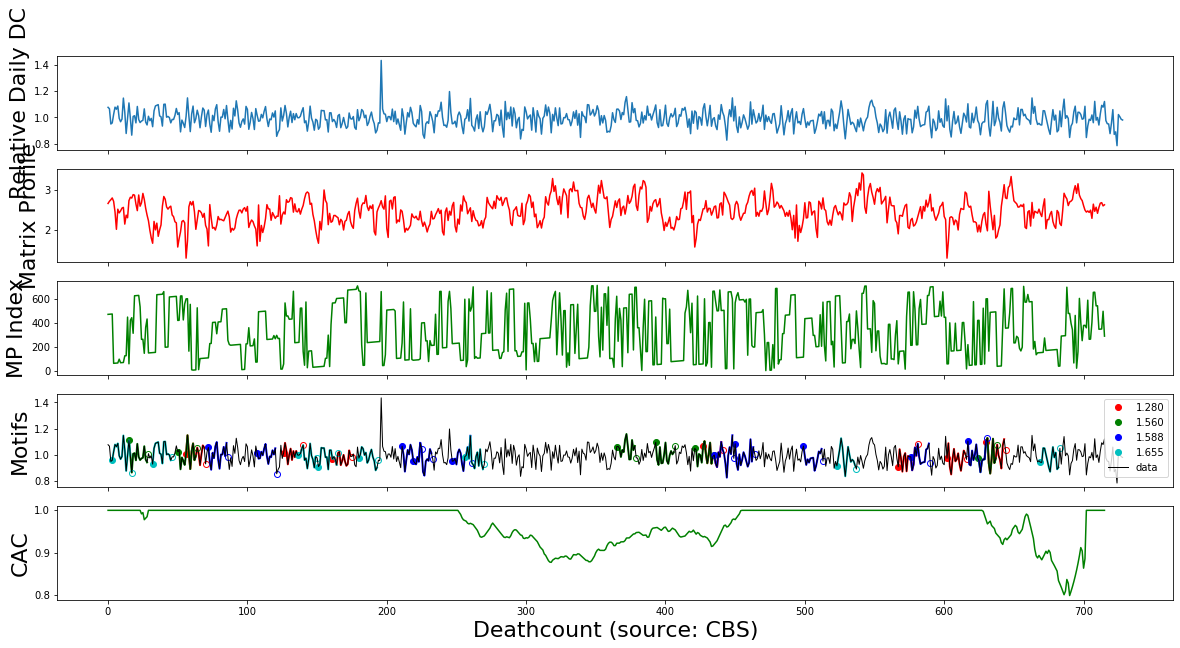

Index values for closest neighbours (lowest distances to other window)
[602 421  32  50  56  72 107 151 495 109]
Lowest Distance values
[1.28033374 1.56006411 1.65519321 1.56006411 1.28033374 1.58821564
 1.58821564 1.65519321 1.70423053 1.70423053]
Corresponding observation index values
[ 56.  50. 151. 421. 602. 107.  72.  32. 109. 495.]
Distances between corresponding observations:
[-546. -371.  119.  371.  546.   35.  -35. -119. -386.  386.]


In [33]:
# I want to investigate a motif in relative daily death count 
d = data.copy()
d.loc[:,'rollingdayavg'] = d.loc[:,'deathCount'].rolling(window=28,center=True).mean()
d.loc[:,'relativeDayCount'] = d.loc[:,'deathCount']/d.loc[:,'rollingdayavg']

data_set = d[(d['date']> datetime.datetime(2014, 1, 1)) & (d['date']< datetime.datetime(2016, 1, 1))]['relativeDayCount'].to_numpy()
mp = matrix_profile(data_set, window=14,signal_title='Relative Daily DC')

analyze_matrix_profile(mp)

I had expected a more clear emergence of a weekly motif. It does not seem very obvious. There seem to be other motifs - perhaps coincidence, perhaps meaningful. Worth a closer look. 

Note: the periods with the highest value in the Matrix Profile plot indicate the most exceptional periods - there may have been something going on at those times.

By looking at the lowest plot (CAC) we can see an indication of potential segmentation between different periods.

## Looking for lower frequency motifs: Relative Monthly Death Count 
In daily metrics such as the one under scrutiny in this example, we would also take a look at the longer term motif - perhaps a yearly motif.

I will calculate the indexed death count for each month and explore whether this yields a motive. 

(take the death count for each month, take the rolling average of 12 months and calculate the indexed death count by dividing the monthly death count by the rolling average to see how each month compares to the 12 month trend)

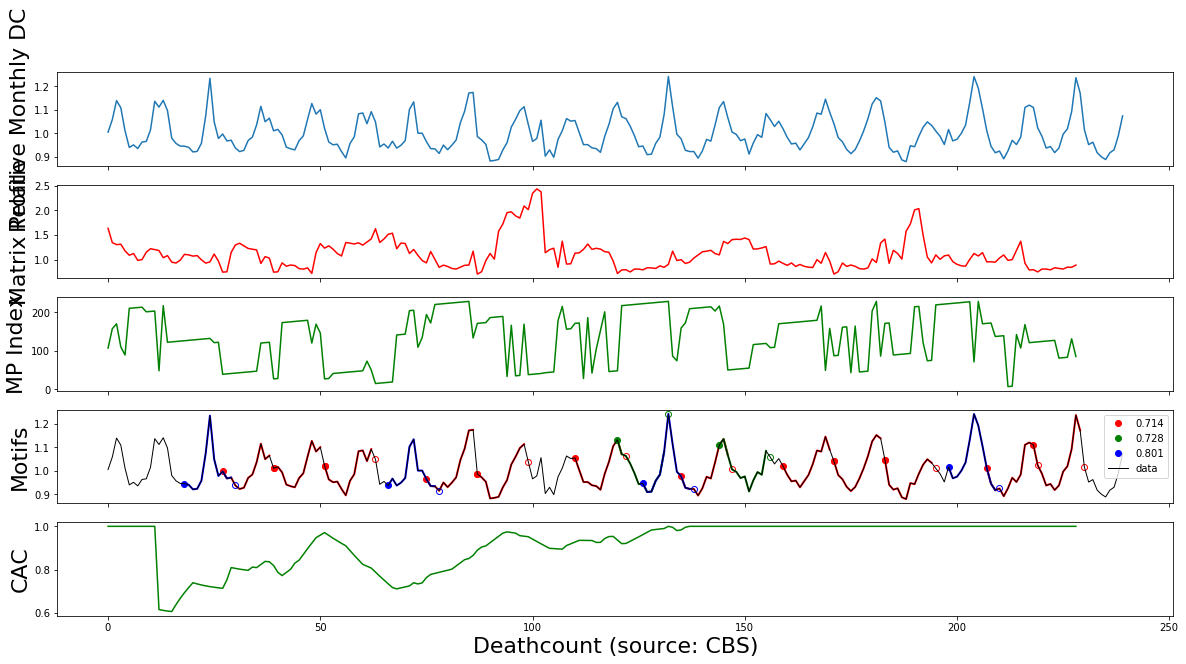

Index values for closest neighbours (lowest distances to other window)
[171  87  39  48 120  27  28 123  40 219]
Lowest Distance values
[0.71397216 0.71397216 0.75416421 0.72771628 0.72771628 0.75416421
 0.76108734 0.75825975 0.76108734 0.75825975]
Corresponding observation index values
[ 87. 171.  27. 120.  48.  39.  40. 219.  28. 123.]
Distances between corresponding observations:
[-84.  84. -12.  72. -72.  12.  12.  96. -12. -96.]


In [34]:
window_width = 12 
d = data.copy()
m = d.copy().resample('M').mean() 
m['monthend'] = m.index
m.loc[:,'rollingMonthAvg'] = m.loc[:,'deathCount'].rolling(window=12,center=False).mean()
m.loc[:,'relativeMonthCount'] = m.loc[:,'deathCount']/m.loc[:,'rollingMonthAvg']
m = m[(m['monthend']> datetime.datetime(1998, 1, 1)) & (m['monthend']< datetime.datetime(2018, 1, 1))]
data_set = m['relativeMonthCount'].to_numpy()
mp = matrix_profile(data_set, window=window_width,signal_title='Relative Monthly DC')

analyze_matrix_profile(mp)

There are several yearly motifs where in each year, the variation of death count over the months evolves in the same way. The strongest repetition is found twelve times (red motif) - with a gaps that are an integer number of years (multiples of 12) apart. 

A second motif occurs four times. I would be interesting to investige how it is different from the red one. And if the years involved are special for some reason.

Let's look at some additional motif plotting for the relative monthly death count.

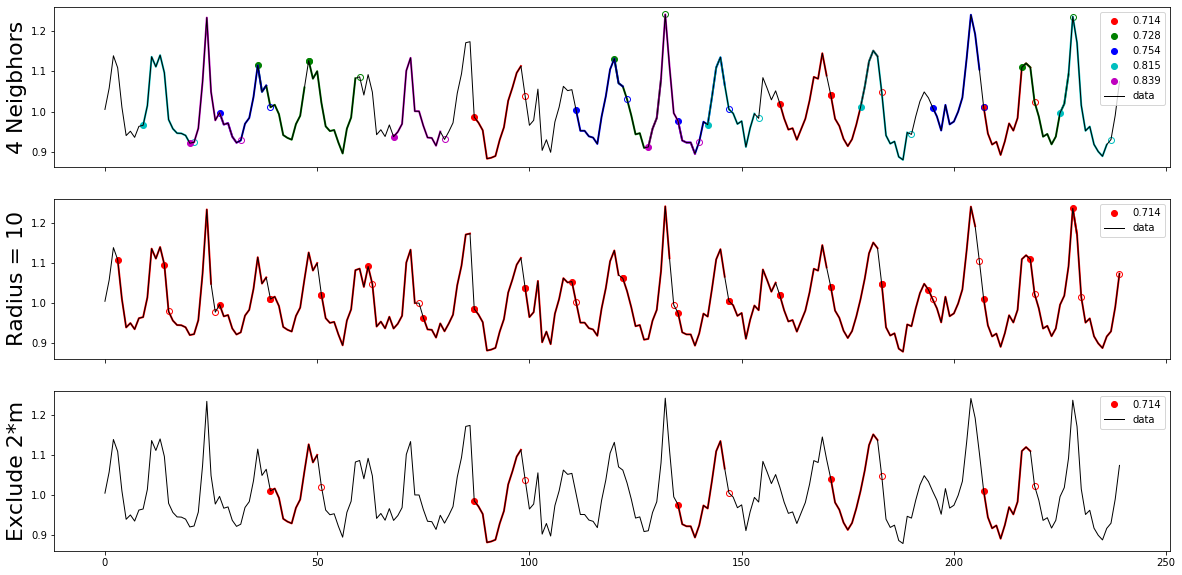

In [35]:
# show other motifs - motifs with at least four occurrences, with radius = 10 and with exclusion zone equal to double window size
more_motif_plotting(signaldata=data_set, matrixprofile=mp,window=window_width)

Look for anomalies - by looking at discords.

In [36]:
from matrixprofile.discords import discords
# see https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Anomalies_Matrix_Profile_Discords.ipynb 

# exclude up to half a year on the left and right side
ex_zone = 6
# profile is a measure for the 'similarity' with the most similar period of window_width months duration; close to 0 is very similar, the higher the less similar
m['profile'] = np.append(mp[0],np.zeros(window_width -1)+np.nan) 
# profile_index is a pointer to the best matching period of window_width duration
m['profile_index'] = np.append(mp[1], np.zeros(window_width - 1) + np.nan)
anoms = discords(m['profile'], ex_zone, k=5)
# print the five biggest anomalies
m.iloc[anoms]

,deathCount,monthend,rollingMonthAvg,relativeMonthCount,profile,profile_index
date,,,,,,
2006-06-30,358.800000,2006-06-30,366.860836,0.978028,2.431947,40.0
2013-12-31,382.161290,2013-12-31,387.027285,0.987427,2.035124,215.0
2005-11-30,359.866667,2005-11-30,374.541846,0.960818,1.954944,33.0
1998-01-31,366.419355,1998-01-31,364.543280,1.005146,1.638779,107.0
2003-04-30,406.766667,2003-04-30,388.030780,1.048285,1.630051,15.0


Plot an interactive Plotly chart of the relative monthly death count - to see how the seasonal fluctuation of deaths looks.

In [37]:
from matrixprofile.discords import discords

# exclude up to half a year on the left and right side
ex_zone = 6
m['profile'] = np.append(mp[0],np.zeros(window_width -1)+np.nan)    
m['profile_index'] = np.append(mp[1], np.zeros(window_width - 1) + np.nan)
anoms = discords(m['profile'], ex_zone, k=5)
# print the five biggest anomalies
m.iloc[anoms]

,deathCount,monthend,rollingMonthAvg,relativeMonthCount,profile,profile_index
date,,,,,,
2006-06-30,358.800000,2006-06-30,366.860836,0.978028,2.431947,40.0
2013-12-31,382.161290,2013-12-31,387.027285,0.987427,2.035124,215.0
2005-11-30,359.866667,2005-11-30,374.541846,0.960818,1.954944,33.0
1998-01-31,366.419355,1998-01-31,364.543280,1.005146,1.638779,107.0
2003-04-30,406.766667,2003-04-30,388.030780,1.048285,1.630051,15.0


In [38]:
# show relative monthly deathcount  
fig = px.line(m, x="monthend", y="relativeMonthCount", render_mode='svg', title="Relative Death Count per Month")
fig.update_layout(xaxis_range=[datetime.datetime(1997, 1, 1),
                               datetime.datetime(2017, 12, 31)],yaxis_range=[0.8,1.3])
fig.show()